In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = load_boston()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['MEDV'] = data.target

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
X = df.drop('MEDV',axis=1)
y = df.pop('MEDV')

In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state = 10)
x_train.shape,y_train.shape

((455, 13), (455,))

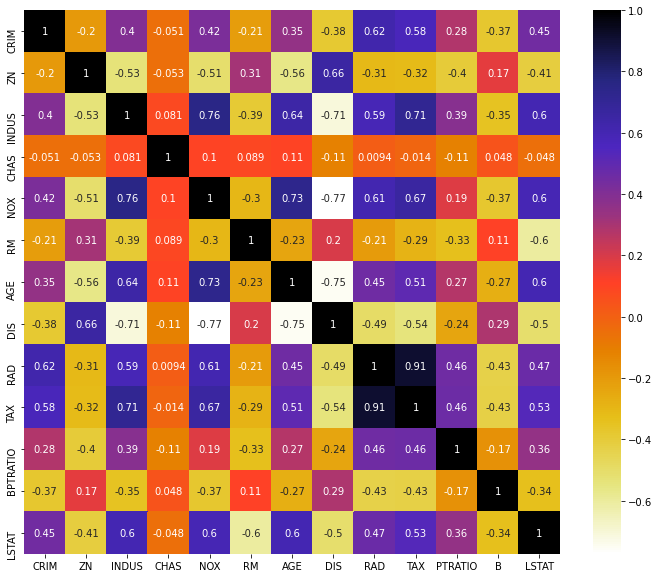

In [6]:
#Visualize the corr relationship
plt.figure(figsize = (12,10))
cor = x_train.corr()
sns.heatmap(cor,annot=True, cmap = plt.cm.CMRmap_r)
plt.show()

In [7]:
def correlation(dataset, threshold):
    # create a set to hold the col name
    corr = set()
    corr_matrix = dataset.corr()
    # check for each row and compares to each column
    for i in range(len(corr_matrix.columns)):
        for j in range(len(corr_matrix.columns)):
            # prevent negative value
            value = abs(corr_matrix.iloc[i,j])
            # value 1 means same column
            if value!= 1 and value > threshold:
                colname = corr_matrix.columns[i]
                # save the column name
                corr.add(colname)
    return corr

In [8]:
corr_features = correlation(x_train,0.8)
corr_features

{'RAD', 'TAX'}

In [9]:
x_train.drop(corr_features,axis=1)
x_test.drop(corr_features,axis=1)
# Rad and Tax cols are dropped

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
305,0.05479,33.0,2.18,0.0,0.4720,6.616,58.1,3.3700,18.4,393.36,8.93
193,0.02187,60.0,2.93,0.0,0.4010,6.800,9.9,6.2196,15.6,393.37,5.03
65,0.03584,80.0,3.37,0.0,0.3980,6.290,17.8,6.6115,16.1,396.90,4.67
349,0.02899,40.0,1.25,0.0,0.4290,6.939,34.5,8.7921,19.7,389.85,5.89
151,1.49632,0.0,19.58,0.0,0.8710,5.404,100.0,1.5916,14.7,341.60,13.28
433,5.58107,0.0,18.10,0.0,0.7130,6.436,87.9,2.3158,20.2,100.19,16.22
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,14.7,374.43,1.73
129,0.88125,0.0,21.89,0.0,0.6240,5.637,94.7,1.9799,21.2,396.90,18.34
269,0.09065,20.0,6.96,1.0,0.4640,5.920,61.5,3.9175,18.6,391.34,13.65
226,0.38214,0.0,6.20,0.0,0.5040,8.040,86.5,3.2157,17.4,387.38,3.13
